# COMP5310 Project Stage 2 Code

## Group Component 1

In [3]:
# install the required packages
%pip install scikit-learn
%pip install pandas
%pip install numpy==1.26.4
%pip install scipy==1.11.4
%pip install matplotlib seaborn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [50]:
# import the required packages
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error, r2_score,make_scorer
from sklearn.metrics import median_absolute_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Preliminary Changes to Data

In [72]:

df = pd.read_csv('Group1_Activity9_FinalCleanData.csv')

labels_logged = df['MarketValue']

features = df.drop(columns=['MarketValue'])

features_without_market_related_factors = features.drop(columns=['ReleaseClause', 'WeeklyWage'])

features_without_market_and_comprehensive_evaluation = features.drop(columns=['ReleaseClause', 'Rating in Scale 100', 'Potential in Scale 100', 'BestOverall', 'WeeklyWage'])

### Data split for train/validation/test sets

In [73]:
# split the data into training, validation and test sets
train_feature, rest_feature, train_labels_logged, rest_labels_logged = train_test_split(features, labels_logged, test_size=0.3, random_state=42)
validation_feature, test_feature, validation_labels_logged, test_labels_logged = train_test_split(rest_feature, rest_labels_logged, test_size=0.5, random_state=42)

train_feature_without_market_and_comprehensive_evaluation, rest_feature_without_market_and_comprehensive_evaluation, train_labels_without_market_and_comprehensive_evaluation_logged, rest_labels_without_market_and_comprehensive_evaluation_logged = train_test_split(features_without_market_and_comprehensive_evaluation, labels_logged, test_size=0.3, random_state=42)
validation_feature_without_market_and_comprehensive_evaluation, test_feature_without_market_and_comprehensive_evaluation, validation_labels_without_market_and_comprehensive_evaluation_logged, test_labels_without_market_and_comprehensive_evaluation_logged = train_test_split(rest_feature_without_market_and_comprehensive_evaluation, rest_labels_without_market_and_comprehensive_evaluation_logged, test_size=0.5, random_state=42)


In [74]:
# check the shape of the data
print('train_feature:')
print(train_feature.shape)
print('validation_feature:')
print(validation_feature.shape)
print('test_feature:')
print(test_feature.shape)
print('--------------------------------------------------------')
print('train_feature_without_market_and_comprehensive_evaluation')
print(train_feature_without_market_and_comprehensive_evaluation.shape)
print('validation_feature_without_market_and_comprehensive_evaluation')
print(validation_feature_without_market_and_comprehensive_evaluation.shape)
print('test_feature_without_market_and_comprehensive_evaluation')
print(test_feature_without_market_and_comprehensive_evaluation.shape)

train_feature:
(10048, 93)
validation_feature:
(2153, 93)
test_feature:
(2154, 93)
--------------------------------------------------------
train_feature_without_market_and_comprehensive_evaluation
(10048, 88)
validation_feature_without_market_and_comprehensive_evaluation
(2153, 88)
test_feature_without_market_and_comprehensive_evaluation
(2154, 88)


----------------------- End of Group Component1 -----------------------

# Individual Component - Unikey: cjia0865

Title: CRAT Regression Tree

Unikey: cjia0865

## Data Processing

In [75]:
# Check for missing values
print(features_without_market_and_comprehensive_evaluation.isnull().sum())

Age                        0
Height                     0
Weight                     0
PreferredFoot              0
AttackingSkills            0
CrossingAbility            0
FinishingAbility           0
HeadingAccuracy            0
ShortPassing               0
Volleys                    0
SkillAttributes            0
Dribbling                  0
CurveAbility               0
FreeKickAccuracy           0
LongPassing                0
BallControl                0
MovementSkills             0
Acceleration               0
SprintSpeed                0
Agility                    0
Reactions                  0
Balance                    0
PowerSkills                0
ShotPower                  0
JumpingAbility             0
Stamina                    0
Strength                   0
LongShots                  0
MentalAttributes           0
Aggression                 0
Interceptions              0
Positioning                0
Vision                     0
Penalties                  0
Composure     

## Initial Model Development and Evaluation

### Initialize and train the model with features

In [76]:
# initial
dt_regressor = DecisionTreeRegressor(random_state=42)

# training by train set
dt_regressor.fit(train_feature, train_labels_logged)

DecisionTreeRegressor(random_state=42)

### verification model

In [77]:
# Predictions on the validation set
validation_predictions_expmed = dt_regressor.predict(validation_feature)

validation_predictions = np.expm1(validation_predictions_expmed)

validation_labels = np.expm1(validation_labels_logged)

# Calculate evaluation metrics
mse = root_mean_squared_error(validation_labels, validation_predictions)
r2 = r2_score(validation_labels, validation_predictions)
mae = mean_absolute_error(validation_labels, validation_predictions)
meae = median_absolute_error(validation_labels, validation_predictions)

print("Validation set mean square error:", mse)
print("Validation set R² score:", r2)
print("Validation set mean absolute error:", mae)
print("Validation set median absolute error:", meae)

Validation set mean square error: 2017501.938880347
Validation set R² score: 0.9355732255847604
Validation set mean absolute error: 315434.27775197395
Validation set median absolute error: 25000.000000000582


### using features_without_market_and_comprehensive_evaluation to initialize and train the model

In [80]:
dt_regressor_wo_market = DecisionTreeRegressor(random_state=42)

dt_regressor_wo_market.fit(train_feature_without_market_and_comprehensive_evaluation,train_labels_without_market_and_comprehensive_evaluation_logged)

DecisionTreeRegressor(random_state=42)

### validation model

In [81]:
validation_predictions_wo_market_logged = dt_regressor_wo_market.predict(validation_feature_without_market_and_comprehensive_evaluation)
validation_predictions_wo_market = np.expm1(validation_predictions_wo_market_logged)

validation_labels_without_market_and_comprehensive_evaluation = np.expm1(validation_labels_without_market_and_comprehensive_evaluation_logged)

mse_wo_market = root_mean_squared_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_wo_market)
r2_wo_market = r2_score(validation_labels_without_market_and_comprehensive_evaluation, validation_predictions_wo_market)
mae_wo_market = mean_absolute_error(validation_labels_without_market_and_comprehensive_evaluation, validation_predictions_wo_market)
meae_wo_market = median_absolute_error(validation_labels_without_market_and_comprehensive_evaluation, validation_predictions_wo_market)

print("Validation set mean square error:", mse_wo_market)
print("Validation set R² score:", r2_wo_market)
print("Validation set mean absolute error:", mae_wo_market)
print("Validation set median absolute error:", meae_wo_market)

Validation set mean square error: 3643271.2411704212
Validation set R² score: 0.7899022128343386
Validation set mean absolute error: 1080603.8086391087
Validation set median absolute error: 224999.99999999802


In [14]:
np.random.seed(42)
data = {
    'Age': np.random.randint(20, 40, 100),
    'Rating in Scale 100': np.random.randint(50, 100, 100),
    'Potential in Scale 100': np.random.randint(50, 100, 100),
    'Height': np.random.uniform(160, 200, 100),
    'Weight': np.random.uniform(50, 100, 100),
    'PreferredFoot': np.random.choice([0, 1], 100),
    'BestOverall': np.random.randint(60, 100, 100),
    'MarketValue': np.random.uniform(10, 50, 100)
}

data = pd.DataFrame(data)

X = data.drop(columns=['MarketValue'])
y = data['MarketValue']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def evaluate_hyperparameter(model, param_name, param_values, X_train, X_val, X_test, y_train, y_val, y_test):
    train_mse_values = []
    val_mse_values = []
    test_mse_values = []
    
    for value in param_values:
        setattr(model, param_name, value)
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        
        train_mse = root_mean_squared_error(y_train, y_train_pred)
        val_mse = root_mean_squared_error(y_val, y_val_pred)
        test_mse = root_mean_squared_error(y_test, y_test_pred)
        
        train_mse_values.append(train_mse)
        val_mse_values.append(val_mse)
        test_mse_values.append(test_mse)
        
        print(f"{param_name} = {value}, Train MSE = {train_mse}, Validation MSE = {val_mse}, Test MSE = {test_mse}")

model = DecisionTreeRegressor()

print("Evaluating max_depth...")
evaluate_hyperparameter(model, 'max_depth', [None, 5, 10, 15, 20], X_train, X_val, X_test, y_train, y_val, y_test)

print("Evaluating min_samples_split...")
evaluate_hyperparameter(model, 'min_samples_split', [2, 5, 10], X_train, X_val, X_test, y_train, y_val, y_test)

print("Evaluating min_samples_leaf...")
evaluate_hyperparameter(model, 'min_samples_leaf', [1, 2, 4], X_train, X_val, X_test, y_train, y_val, y_test)

print("Evaluating ccp_alpha...")
evaluate_hyperparameter(model, 'ccp_alpha', [0.0, 0.01, 0.1, 0.2], X_train, X_val, X_test, y_train, y_val, y_test)

Evaluating max_depth...
max_depth = None, Train MSE = 0.0, Validation MSE = 161.62416174020194, Test MSE = 192.2329885186525
max_depth = 5, Train MSE = 8.997311538800268, Validation MSE = 156.68263704038807, Test MSE = 151.2487828086505
max_depth = 10, Train MSE = 0.0022551907208617993, Validation MSE = 139.91115932326394, Test MSE = 181.11953930151842
max_depth = 15, Train MSE = 0.0, Validation MSE = 161.3684810679943, Test MSE = 194.77471733846036
max_depth = 20, Train MSE = 0.0, Validation MSE = 138.61012135855262, Test MSE = 190.50185551844672
Evaluating min_samples_split...
min_samples_split = 2, Train MSE = 0.0, Validation MSE = 146.9492667684848, Test MSE = 171.48882872594564
min_samples_split = 5, Train MSE = 14.905503532210645, Validation MSE = 147.3732968067285, Test MSE = 170.50239841284383
min_samples_split = 10, Train MSE = 43.48864043171688, Validation MSE = 155.08143049455128, Test MSE = 135.1012620942927
Evaluating min_samples_leaf...
min_samples_leaf = 1, Train MSE = 4

## Model Optimization

### hyperparameter tuning

In [89]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring= 'r2',
    n_jobs=-1
)

# Training Grid Search
grid_search.fit(train_feature, train_labels_logged)

# optimal parameter
print("Optimal parameters found:", grid_search.best_params_)

# best estimator
best_dt_regressor = grid_search.best_estimator_


Optimal parameters found: {'ccp_alpha': 0.0, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [90]:
# Predictions on validation sets using optimal models
validation_predictions_best_logged = best_dt_regressor.predict(validation_feature)

validation_predictions_best = np.expm1(validation_predictions_best_logged)
validation_labels = np.expm1(validation_labels_logged)

mse_best = root_mean_squared_error(validation_labels, validation_predictions_best)
r2_best = r2_score(validation_labels, validation_predictions_best)
mae_best = mean_absolute_error(validation_labels, validation_predictions_best)
meae_best = median_absolute_error(validation_labels, validation_predictions_best)

print("Mean Square Error of the Validation Set after Tuning:", mse_best)
print("R² Score for the tuned validation set:", r2_best)
print("Mean Absolute Error of the Validation Set after Tuning:", mae_best)
print("Median Absolute Error of the Validation Set after Tuning:", meae_best)


Mean Square Error of the Validation Set after Tuning: 1814900.7054764202
R² Score for the tuned validation set: 0.947863219931624
Mean Absolute Error of the Validation Set after Tuning: 302752.5572014465
Median Absolute Error of the Validation Set after Tuning: 35779.96855781553


### turning for features_without_market_and_comprehensive_evaluation

In [87]:
grid_search_wo_market = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring= 'r2',
    n_jobs=-1
)

grid_search_wo_market.fit(train_feature_without_market_and_comprehensive_evaluation, train_labels_without_market_and_comprehensive_evaluation_logged)

print("Optimal parameters found:", grid_search_wo_market.best_params_)

best_dt_regressor_wo_market = grid_search_wo_market.best_estimator_

validation_predictions_best_wo_best_logged = best_dt_regressor_wo_market.predict(validation_feature_without_market_and_comprehensive_evaluation)

validation_predictions_best_wo_best = np.expm1(validation_predictions_best_wo_best_logged)
validation_labels_without_market_and_comprehensive_evaluation = np.expm1(validation_labels_without_market_and_comprehensive_evaluation_logged)

mse_best_wo_market = root_mean_squared_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best)
r2_best_wo_market = r2_score(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best)
mae_best_wo_market = mean_absolute_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best)
meae_best_wo_market = median_absolute_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best)

print("Mean Square Error of the Validation Set after Tuning:", mse_best_wo_market)
print("R² Score for the tuned validation set:", r2_best_wo_market)
print("Mean Absolute Error of the Validation Set after Tuning:", mae_best_wo_market)
print("Median Absolute Error of the Validation Set after Tuning:", meae_best_wo_market)

Optimal parameters found: {'ccp_alpha': 0.0, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Square Error of the Validation Set after Tuning: 3530643.3109216485
R² Score for the tuned validation set: 0.802691335996589
Mean Absolute Error of the Validation Set after Tuning: 1031771.9917427321
Median Absolute Error of the Validation Set after Tuning: 204215.6882899294


In [124]:
param_grid_update_1 = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]
}

grid_search_wo_market_update1 = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_update_1,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search_wo_market_update1.fit(train_feature_without_market_and_comprehensive_evaluation, train_labels_without_market_and_comprehensive_evaluation_logged)

print("Optimal parameters found:", grid_search_wo_market_update1.best_params_)

best_dt_regressor_wo_market_update = grid_search_wo_market_update1.best_estimator_

validation_predictions_best_wo_best_logged_update = best_dt_regressor_wo_market_update.predict(validation_feature_without_market_and_comprehensive_evaluation)

validation_predictions_best_wo_best_update = np.expm1(validation_predictions_best_wo_best_logged_update)
validation_labels_without_market_and_comprehensive_evaluation = np.expm1(validation_labels_without_market_and_comprehensive_evaluation_logged)

mse_best_wo_market_update = root_mean_squared_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best_update)
r2_best_wo_market_update = r2_score(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best_update)
mae_best_wo_market_update = mean_absolute_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best_update)
meae_best_wo_market_update = median_absolute_error(validation_labels_without_market_and_comprehensive_evaluation,validation_predictions_best_wo_best_update)

print("Mean Square Error of the Validation Set after Tuning:", mse_best_wo_market_update)
print("R² Score for the tuned validation set:", r2_best_wo_market_update)
print("Mean Absolute Error of the Validation Set after Tuning:", mae_best_wo_market_update)
print("Median Absolute Error of the Validation Set after Tuning:", meae_best_wo_market_update)

Optimal parameters found: {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Square Error of the Validation Set after Tuning: 3603880.3139105095
R² Score for the tuned validation set: 0.7944207932403099
Mean Absolute Error of the Validation Set after Tuning: 1005479.6146954761
Median Absolute Error of the Validation Set after Tuning: 216324.41938372713


## Model results

### Test set evaluation of final model 

#### Using features

In [104]:
test_predictions_logged = best_dt_regressor.predict(test_feature)
test_predictions = np.expm1(test_predictions_logged)
test_labels = np.expm1(test_labels_logged)

mse_test = root_mean_squared_error(test_labels,test_predictions)
r2_test = r2_score(test_labels,test_predictions)
mae_test = mean_absolute_error(test_labels,test_predictions)
meae_test = median_absolute_error(test_labels,test_predictions)

print("Test Set Mean Square Error:", mse_test)
print("Test Set R² Score.", r2_test)
print("Test mean absolute error:" , mae_test)
print("Test median absolute error:" , meae_test)

Test Set Mean Square Error: 1742951.6504770364
Test Set R² Score. 0.9564576726529148
Test mean absolute error: 377473.67787738796
Test median absolute error: 38866.08516642358


#### using features_without_market_and_comprehensive_evaluation

In [126]:
test_predictions_wo_market_logged = best_dt_regressor_wo_market_update.predict(test_feature_without_market_and_comprehensive_evaluation)

test_predictions_wo_market = np.expm1(test_predictions_wo_market_logged)
test_labels_without_market_and_comprehensive_evaluation = np.expm1(test_labels_without_market_and_comprehensive_evaluation_logged)

mse_test_wo_market = root_mean_squared_error(test_labels_without_market_and_comprehensive_evaluation,test_predictions_wo_market)
r2_test_wo_market = r2_score(test_labels_without_market_and_comprehensive_evaluation,test_predictions_wo_market)
mae_test_wo_market = mean_absolute_error(test_labels_without_market_and_comprehensive_evaluation,test_predictions_wo_market)
meae_test_wo_market = median_absolute_error(test_labels_without_market_and_comprehensive_evaluation,test_predictions_wo_market)

print("Test Set Mean Square Error:", mse_test_wo_market)
print("Test Set R² Score:", r2_test_wo_market)
print("Test mean absolute error:" , mae_test_wo_market)
print("Test median absolute error:" , meae_test_wo_market)

Test Set Mean Square Error: 4095871.5580903934
Test Set R² Score: 0.7595451080781633
Test mean absolute error: 1176322.82716206
Test median absolute error: 219985.8127357245


### Plotting Residuals and Scatterplots

In [127]:
final_predictions_logged = best_dt_regressor.predict(test_feature)

final_predictions = np.expm1(final_predictions_logged)

test_labels_original = np.expm1(test_labels_logged)

final_results = pd.DataFrame({
    'Actual Market Value': test_labels_original,
    'Predicted Market Value': final_predictions
})

print("\nFinal Market Value forecast using features:")
print(final_results.head())



Final Market Value forecast using features:
       Actual Market Value  Predicted Market Value
5044              325000.0            2.491532e+05
9955              900000.0            9.000000e+05
12548             250000.0            2.664006e+05
740             12500000.0            1.384126e+07
9763              900000.0            9.000000e+05


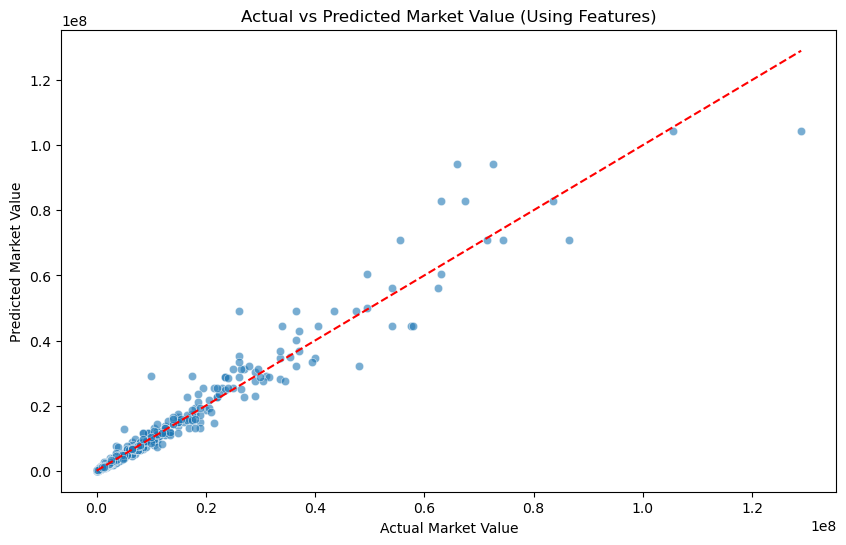

In [128]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_original, y=final_predictions, alpha=0.6)
plt.plot([min(test_labels_original), max(test_labels_original)], [min(test_labels_original), max(test_labels_original)], color='red', linestyle='--') 
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs Predicted Market Value (Using Features)')
plt.show()

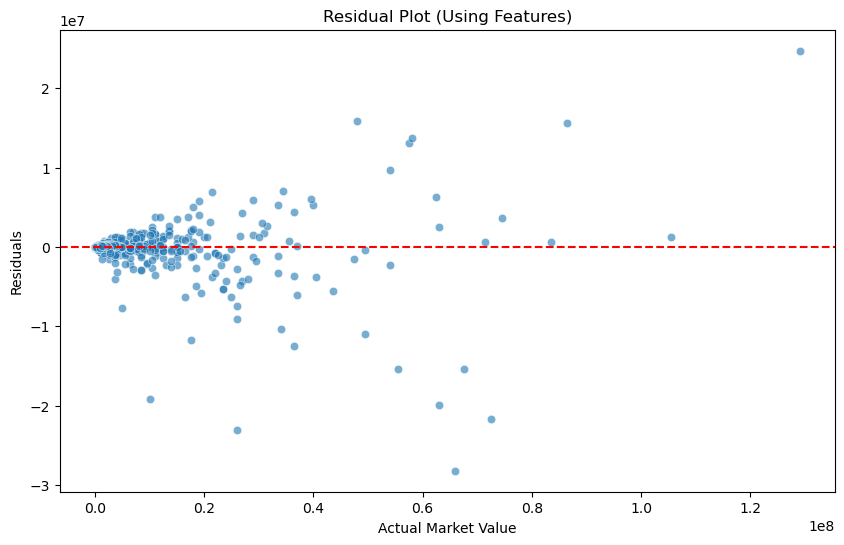

In [129]:
residuals = test_labels_original - final_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_original, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Actual Market Value')
plt.ylabel('Residuals')
plt.title('Residual Plot (Using Features)')
plt.show()

#### Visualization of characteristic importance of features

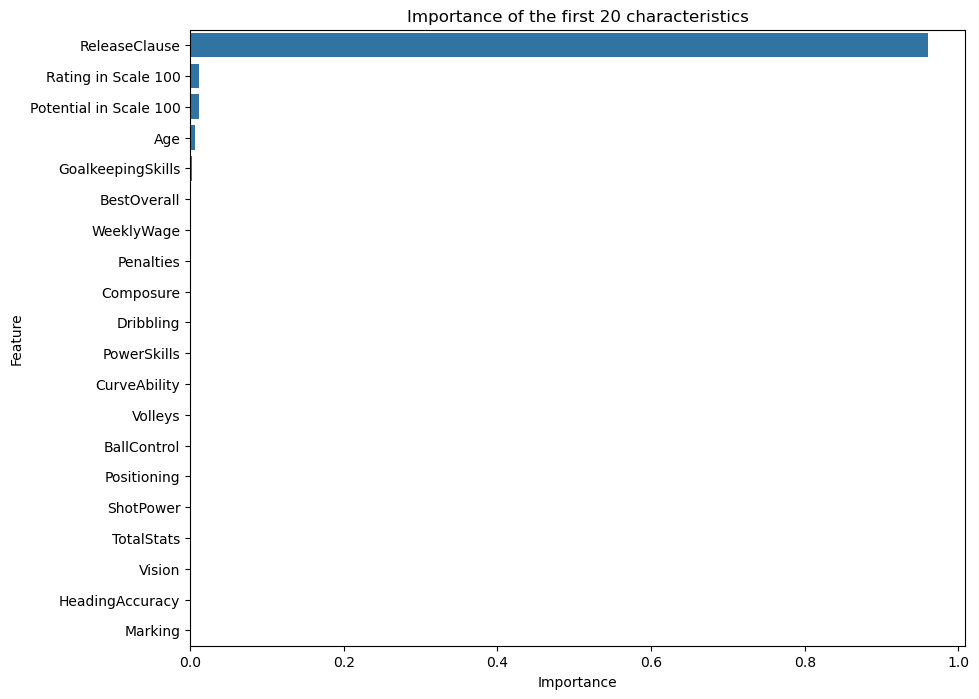

In [130]:
importances = best_dt_regressor.feature_importances_

# Create DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': train_feature.columns,
    'Importance': importances
})

# Sort the DataFrame
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Mapping the importance of characterization
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Importance of the first 20 characteristics')
plt.show()

#### features_without_market_and_comprehensive_evaluation

In [131]:
final_predictions_wo_market_logged = best_dt_regressor_wo_market_update.predict(test_feature_without_market_and_comprehensive_evaluation)

final_predictions_wo_market = np.expm1(final_predictions_wo_market_logged)
test_labels_without_market_and_comprehensive_evaluation = np.expm1(test_labels_without_market_and_comprehensive_evaluation_logged)

final_results_wo_market = pd.DataFrame({
    'Actual Market Value': test_labels_without_market_and_comprehensive_evaluation,
    'Predicted Market Value': final_predictions_wo_market
})

print("\nFinal Market Value forecast using features_without_market_and_comprehensive_evaluation:")
print(final_results_wo_market.head())


Final Market Value forecast using features_without_market_and_comprehensive_evaluation:
       Actual Market Value  Predicted Market Value
5044              325000.0            3.850296e+05
9955              900000.0            5.492344e+05
12548             250000.0            3.970344e+05
740             12500000.0            1.239613e+07
9763              900000.0            8.082957e+05


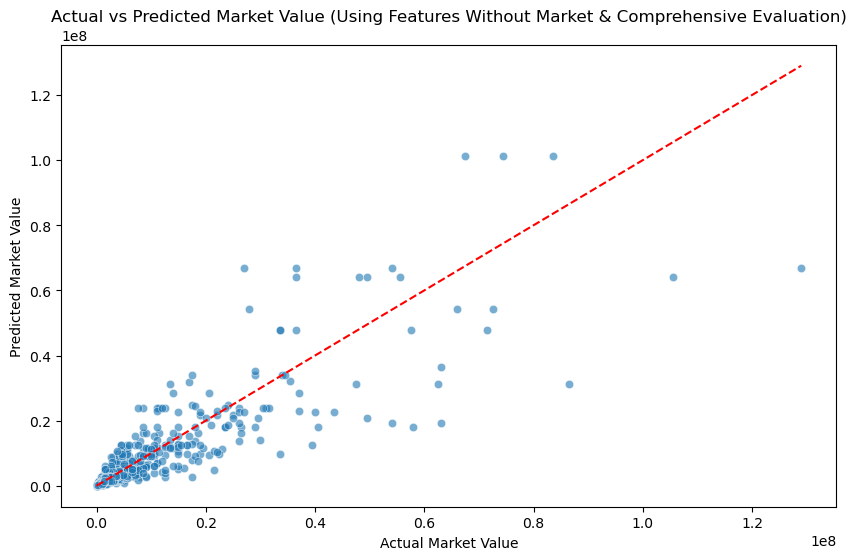

In [132]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_without_market_and_comprehensive_evaluation, y=final_predictions_wo_market, alpha=0.6)
plt.plot([min(test_labels_without_market_and_comprehensive_evaluation), max(test_labels_without_market_and_comprehensive_evaluation)], [min(test_labels_without_market_and_comprehensive_evaluation), max(test_labels_without_market_and_comprehensive_evaluation)], color='red', linestyle='--')  
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs Predicted Market Value (Using Features Without Market & Comprehensive Evaluation)')
plt.show()

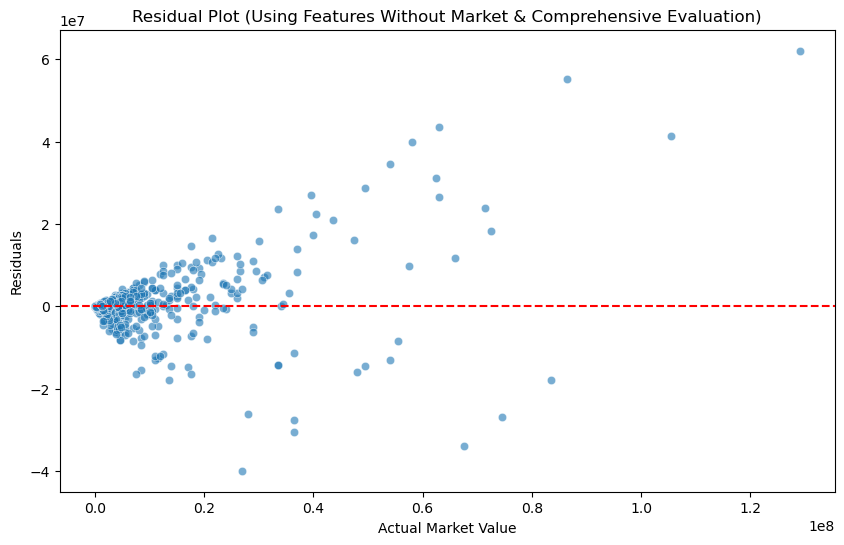

In [133]:
residuals_wo = test_labels_without_market_and_comprehensive_evaluation - final_predictions_wo_market

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels_without_market_and_comprehensive_evaluation, y=residuals_wo, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel('Actual Market Value')
plt.ylabel('Residuals')
plt.title('Residual Plot (Using Features Without Market & Comprehensive Evaluation)')
plt.show()

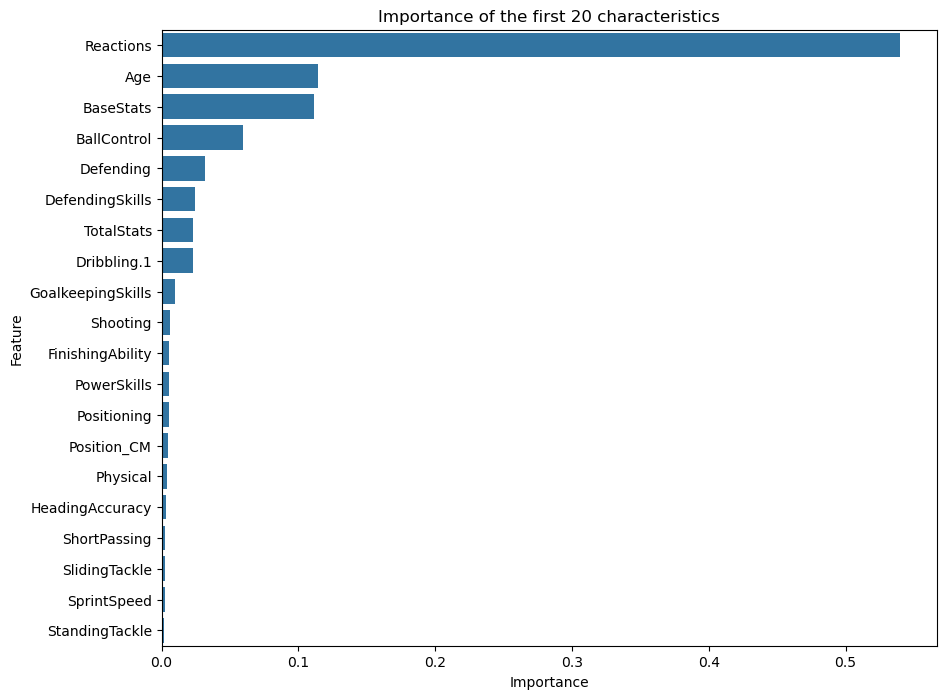

In [134]:
importances = best_dt_regressor_wo_market_update.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': train_feature_without_market_and_comprehensive_evaluation.columns,
    'Importance': importances
})


feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Importance of the first 20 characteristics')
plt.show()

----------------------- End of Individual Component - Unikey: cjia0865 -----------------------

## Group Component2

### Optimal Model Comparison

### Final Model Recommendation

----------------------- End of Group Component 2 -----------------------